# ED data wrangling

Emergency departments around the world must deal with highly attendance numbers on a daily basis. The following exercises work with multiple ED datasets.  You will wrangle the dataset into a useful format using `pandas `and then visualise the time series using `matplotlib`.

The data sets used in these exercises are synthetic, but have been generated to reflect real emergency department demand in the United Kingdom.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datasets

The dataset `syn_ts_ed_long.csv` contains data from 4 emergency departments in 2014.  The data are stored in **long** (sometimes called **tidy**) format.  You are provided with three columns: `date` (non unique date time formatted), `hosp` (int 1-4) and `attends` (int, daily number of attends at hosp $i$)

The dataset `syn_ts_wide.csv` contains the same data in wide format.  Each row now represents a unique date and each hospital ED has its own column. 



## Exercise 1

**Task 1:**

* Read the two datasets into a pandas dataframe and inspect the columns and data so that you understand the dataset description above.

**Hints**:
* The URL's for the datasets are provided below.

In [2]:
LONG_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_long.csv'
WIDE_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_wide.csv'

In [3]:
long_ed_data = pd.read_csv(LONG_URL)
wide_ed_data = pd.read_csv(WIDE_URL)

In [4]:
long_ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1100 non-null   object
 1   hosp     1100 non-null   int64 
 2   attends  1100 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.9+ KB


In [5]:
long_ed_data.head()

,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


In [6]:
long_ed_data.tail()

,date,hosp,attends
1095,2014-12-27,4,198
1096,2014-12-28,4,176
1097,2014-12-29,4,164
1098,2014-12-30,4,164
1099,2014-12-31,4,148


In [7]:
wide_ed_data.head()

,date,hosp_1,hosp_2,hosp_3,hosp_4
0,2014-04-01,331,287,195,184
1,2014-04-02,340,293,177,181
2,2014-04-03,316,249,183,192
3,2014-04-04,304,313,208,157
4,2014-04-05,292,291,218,166


In [8]:
wide_ed_data.tail()

,date,hosp_1,hosp_2,hosp_3,hosp_4
270,2014-12-27,346,353,258,198
271,2014-12-28,285,301,214,176
272,2014-12-29,318,266,215,164
273,2014-12-30,308,214,182,164
274,2014-12-31,248,242,174,148


## Exercise 2:

Assume you have only been provided with `syn_ts_ed_long.csv`.

**Task:**
* Convert the data into wide format.
* the output of your code should a `pd.Dataframe` equivalent to `syn_ts_ed_wide.csv`
* Make a decision about the appropraite data types for each of the series.  For example, by default the attendance column is an `int64`.  Is this sensible? What other type of integer could the hospital columns be stored as?  

**Advanced Task:**
* Your data wrangling code should make use of **chained commands** in `pandas`.

**Hints**
* There are various ways to complete this task.  You may want to make use of `pivot_table`.
* One complication with a pivot is that you end up with a `MultiIndex` column for the hospital and number of attends. This is not always particularly clear for labelling. An option is to remove the Mulit-index during wrangling.  You could explore the of transposing the `pd.Dataframe` using `.T` and the `.reset_index()` to drop the index.
* You may want to build up your code command by command to help debug as you go along.
* Don't forget about data types.  
 

In [9]:
# long_ed_data = long_ed_data.assign(date=lambda x: pd.to_datetime(x['date']))
wf_ed = long_ed_data.pivot_table(values=['attends'], index=['date'], columns=['hosp'])
wf_ed = wf_ed.T.reset_index(drop=True).T
hospital_names = {0:'hospital_1', 
                  1:'hospital_2', 
                  2:'hospital_3', 
                  3:'hospital_4'}
wf_ed = wf_ed.rename(columns=hospital_names)
wf_ed = wf_ed.assign(date=lambda x: pd.to_datetime(x.index))
wf_ed.set_index('date')

,hospital_1,hospital_2,hospital_3,hospital_4
date,,,,
2014-04-01,331.0,287.0,195.0,184.0
2014-04-02,340.0,293.0,177.0,181.0
2014-04-03,316.0,249.0,183.0,192.0
2014-04-04,304.0,313.0,208.0,157.0
2014-04-05,292.0,291.0,218.0,166.0
...,...,...,...,...
2014-12-27,346.0,353.0,258.0,198.0
2014-12-28,285.0,301.0,214.0,176.0
2014-12-29,318.0,266.0,215.0,164.0


In [10]:
def ed_data_to_wide(file_path):
    '''
    Return the ED data in wide format.
    
    1. Pivot table
    2. Transpose and drop the ('attends', hosp_i) multi-index
    3. Rename columns [0, 1, 2, 4] tp ['hosp_1', 'hosp_2', 'hosp_3', 'hosp_4']
    4. Index to DateTimeIndex
    5. Drop the additional uneeded series 'date' (as stored in index as well)
    6. Convert attendence numbers from int64 to int16
    
    Params:
    ------
    file_path: str
        Path to wide format file
        
    Returns:
    -------
    pandas.DataFrame
    '''
    # column name transfers
    translated_names = {0:'hosp_1', 
                        1:'hosp_2',
                        2:'hosp_3',
                        3:'hosp_4'}

    data_types = {'hosp_1':np.int16, 
                  'hosp_2':np.int16,
                  'hosp_3':np.int16,
                  'hosp_4':np.int16}

    df = (pd.read_csv(file_path)
            .pivot_table(values=['attends'], index=['date'], columns=['hosp'])
            .T.reset_index(drop=True)
            .T.rename(columns=translated_names)
            .assign(date=lambda x: pd.to_datetime(x.index))
            .set_index('date')
            .astype(data_types)
         )

    return df

In [11]:
wide_df = ed_data_to_wide(LONG_URL)
wide_df.head()

,hosp_1,hosp_2,hosp_3,hosp_4
date,,,,
2014-04-01,331,287,195,184
2014-04-02,340,293,177,181
2014-04-03,316,249,183,192
2014-04-04,304,313,208,157
2014-04-05,292,291,218,166


## Exercise 3:

Now assume that you have been provided with the data in `syn_ts_ed_wide.csv`

**Task**:
* Convert the dataset from wide format to long (tidy) format.

**Advanced task**
* Your data wrangling code should make use of **chained commands** in `pandas`.

**Hints:**
* Investigate the `pandas` function `wide_to_long()` or the function `melt()`

In [12]:
wide_ed_data.head()
ln_ed = pd.wide_to_long(wide_ed_data, stubnames='hosp_', i=['date'], j='hosp')
column_name = {'hosp_':'attends'}
ln_ed = ln_ed.rename(columns=column_name)
ln_ed = ln_ed.reset_index()
ln_ed = ln_ed.assign(date=lambda x: pd.to_datetime(x['date']))
ln_ed.head()

,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


In [13]:
def ed_data_to_long(file_path):
    '''
    Return the ED data in long format. Uses pd.wide_to_long()
    Assume wide format file is used.
    
    1. pd.wide_to_long()
    2. reset_index() to remove multi-index
    3. rename col 'hosp_'  to 'attends'
    4. date to datetime
    5. Convert attendence numbers from int64 to int16 amd hosp_id to int8.
    (could also be a categorical field.)
    
    Params:
    ------
    file_path: str
        Path to wide format file
        
    Returns:
    -------
    pandas.DataFrame
    '''

    translated_names = {'hosp_':'attends'}
    data_types = {'hosp': np.int8, 'attends':np.int16}

    long_df = ( 
                pd.wide_to_long(pd.read_csv(file_path), stubnames='hosp_', 
                                i=['date'], j='hosp')
                .reset_index()
                .rename(columns=translated_names)
                .assign(date=lambda x: pd.to_datetime(x['date']))
                .astype(data_types)
                )

    return long_df

In [14]:
long_df = ed_data_to_long(WIDE_URL)
long_df.head()

,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


## Exercise 4

We will now move onto visualising the dataset using `matplotlib`

**Task**:
* Using the wide format data, create a line plot of the data for the ED located at hospital 1. 
* Label the y axis 'Attendances'
* Label x axis 'Date'
* Use a fontsize of 12
* Provide a background grid for the plot.
* Save the plot as a .png file with dpi of 300.

**Hints**
* Feel free to adapt the plot to improve its appearance using whatever `matplotlib` options you prefer.



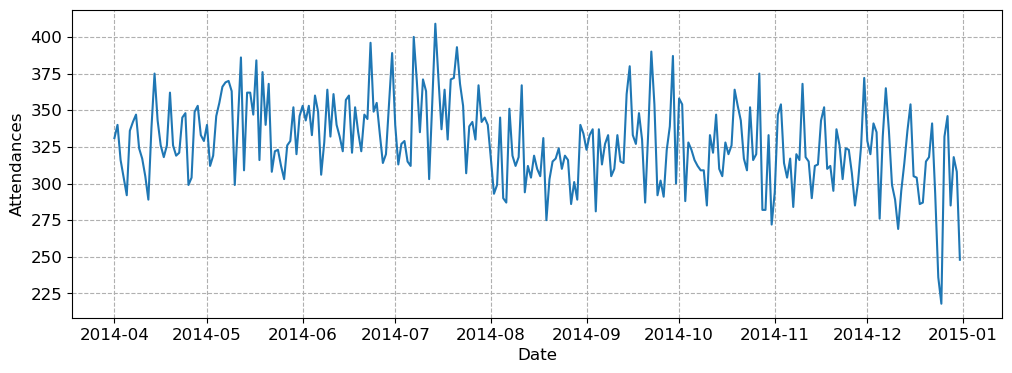

In [18]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
line_plot = ax.plot(wide_df['hosp_1'])
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Attendances', fontsize=12)
ax.grid(linestyle='--')
ax.tick_params(axis='both', labelsize=12)

## Exercise 5

**Task**:
* Create a grid of subplots with 1 column and 4 rows.  Each subplot should display one of the hospital ED's. 
* Label each subplot with the appropraite hospital.
* Provide an overall figure y axis label of 'ED Attendances'
* Give the figure and appropriate sizing

**Hints:**
* There are several ways to create a grid of subplots.  The easiest for this problem is to use the **factory** function `plt.subplots()`.  Refer back to the `matplotlib` sections in the book for help.
* If you are using `matplotlib` version 3.4 or above you can use `fig.supylabel()` and `figsupxlabel()` to set an overall axis label.


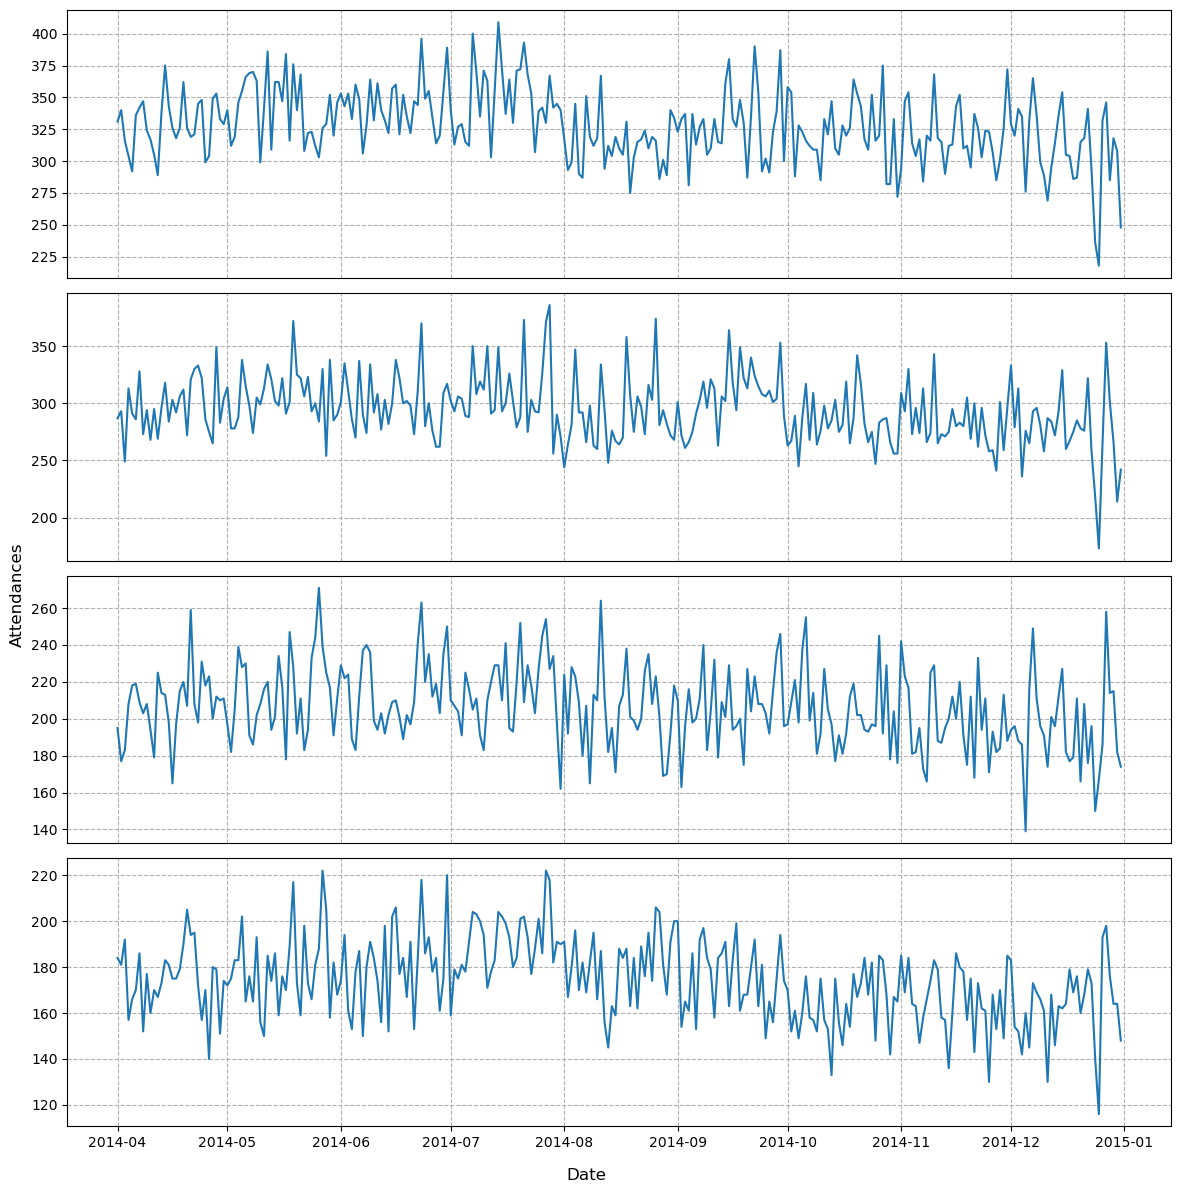

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, 
                                         figsize=(12,12), tight_layout=True)
_ = ax1.plot(wide_df['hosp_1'])
_ = ax1.grid(linestyle='--')
_ = ax1.tick_params(which='both', bottom=False)
_ = ax2.plot(wide_df['hosp_2'])
_ = ax2.grid(linestyle='--')
_ = ax2.tick_params(which='both', bottom=False)
_ = ax3.plot(wide_df['hosp_3'])
_ = ax3.grid(linestyle='--')
_ = ax3.tick_params(which='both', bottom=False)
_ = ax4.plot(wide_df['hosp_4'])
_ = ax4.grid(linestyle='--')
_ = fig.supxlabel('Date', fontsize=12)
_ = fig.supylabel('Attendances', fontsize=12)